# Is Airbnb profitable business?

### To understand Airbnb business model better we've analyzed L.A. City market to find out:

* What would be the average night rate for a room/apartment in LA?
* What variables determine the price of the night rate in Airbnb? (Pendiente Alfonso)
* How big is LA Airbnb market?
* Which part of the city is more profitable?
* Are they changing their rates according to the month/season?
* Is price influenced by location or reviews?

# Airbnb Los Angeles Data Analysis 
### Team members
* George Márquez
* Nestos Matus
* Alfonso Delgado
* Alberto Castillo

# Data preparation

### Challenge:
* Gather information from a web site with no API support
* CSV files were separated per month
* No "month" column included
* Some columns like price hadn't int or float values but strings

### Solution
* Build a script to download every csv file according to url directory: http://data.insideairbnb.com/united-states/ca/los-angeles/2019-07-08/data/listings.csv.gz
* Rename CSV files according file downloaded
* Build a loop script to insert "month" column inside each file and apply a replace/regex function to convert price column from string to float 

We will perform exploratory data analysis on the Airbnb dataset gotten from Inside Airbnb.

In [1]:
# Standard library imports
from IPython.display import display, HTML
# Third party imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

# Local application imports
##from modules import pyneers
# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

#Code to diplay all data columns 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

error_message_ = 'Loading data, please wait...'
#Load Airbnb Data Frame and assign to a CONSTANT
print(error_message_)
try:
    error_message_ = 'System ready'
    AIRBNB_DT = pd.read_csv('csv/airbnb_cleaned3.csv')
    print(error_message_)
except:
    print("Unexpected error found. Make sure CSV exists")

Loading data, please wait...
System ready


In [2]:
# Local application imports
##from modules import Airbnb
class Airbnb:
    def __init__(self, city):
        self.city = city
        self.df = AIRBNB_DT[AIRBNB_DT['state'] == self.city]
        #self.df['pythrs_month'].replace('may-19', 'May 2019')
        self.list_months = self.df.groupby('pythrs_month').id.count().reset_index() 
        self.list_months.columns = ['Months', 'Rows']
        print(f"{self.city} loaded and ready to analyze:")
        self.list_months['Rows'] = self._put_format_rows(self.list_months, 'Rows', 'float')
        display(self.reindex_(self.list_months))
        
        return None
        
    #Internal: It can be call by other method only.
    def _line_plot(self, axis_x, axis_y, title, label_x, label_y, zoom_x, zoom_y):
        line_plot_xlabel = axis_x
        line_plot_ylabel = axis_y
        
        fig, line_plot_name = plt.subplots(figsize=(8,5))
        fig.suptitle(title, fontsize='14')
        
        line_plot_name.plot(line_plot_xlabel, line_plot_ylabel)
        
        line_plot_name.grid()
        line_plot_name.set_xlabel(label_x)
        line_plot_name.set_ylabel(label_y)
        try:
            if list(zoom_x):
                line_plot_name.set_xlim(zoom_x)
        except:
            pass
        try:
            if list(zoom_y):
                line_plot_name.set_ylim(zoom_y)
        except:
            pass

        return plt.show()
    
    #Internal: It can be call by other method only.
    def _scatter_plot(self, axis_x, axis_y, title, label_x, label_y, zoom_x, zoom_y):
        fig, plot_name = plt.subplots(figsize=(18,5))
        fig.suptitle(title, fontsize='14')

        plot_name.scatter(axis_x, axis_y, color='g', marker='o', edgecolors='r')

        plot_name.grid()
        plot_name.set_xlabel(label_x)
        plot_name.set_ylabel(label_y)
        try:
            if list(zoom_x):
                plot_name.set_xlim(zoom_x)
        except:
            pass
        try:
            if list(zoom_y):
                plot_name.set_ylim(zoom_y)
        except:
            pass
        plot_name.legend(loc='best')
        return plt.show()
    
    #Internal: It can be call by other method only.
    def _bar_plot(self, axis_x, axis_y, title, label_x, label_y, zoom_x, zoom_y):
        bar_xlabel = axis_x
        bar_ylabel = axis_y
        
        fig, bar_plot_name = plt.subplots(figsize=(25,5))
        fig.suptitle(title, fontsize='14')
        
        bar_plot_name.bar(bar_xlabel, bar_ylabel, align='center', alpha=0.5)
        
        bar_plot_name.grid()
        bar_plot_name.set_xlabel(label_x)
        bar_plot_name.set_ylabel(label_y)
        try:
            if list(zoom_x):
                bar_plot_name.set_xlim(zoom_x)
        except:
            pass
        try:
            if list(zoom_y):
                bar_plot_name.set_ylim(zoom_y)
        except:
            pass

        return plt.show()
    
    #Internal: It can be call by other method only.
    def _stackedbar_plot(self, pivot_table, title, label_x, label_y, zoom_x, zoom_y):
        stkbar = pivot_table.plot(kind='bar', 
                              title=title, 
                              figsize=(25,8),
                                  stacked=True
                             )
        
        stkbar.grid()
        stkbar.set_xlabel(label_x)
        stkbar.set_ylabel(label_y)
        stkbar.set_xticklabels(pivot_table['Month'])
        stkbar.legend(loc='best')
        try:
            if list(zoom_x):
                stkbar.set_xlim(zoom_x)
        except:
            pass
        try:
            if list(zoom_y):
                stkbar.set_ylim(zoom_y)
        except:
            pass
        return None
    
    #Internal: Determine whether a zoom value is valid or not
    def _is_zoom(self, zoom_val):
        if zoom_val[0] > 0 or zoom_val[1] > 0:
            return zoom_val
        else:
            return False
        
    #Internal: Apply format to columns
    def _put_format_rows(self, df, row, type_format):
        if not isinstance(df, pd.DataFrame):
            if type_format == 'money':
                return '${:,.2f}'.format(row)
            else:
                return '%.2f' % row
        else:
            if type_format == 'money':
                df[row] = df[row].map('${:,.2f}'.format)
                return df[row]
            else:
                df[row] = df[row].map('{:,.2f}'.format)
                return df[row]

    #Reindex
    def reindex_(self, df):
        new_order = [2,11,10,9,3,5,4,8,1,0,7,6]
        df = df.reindex(new_order)
        return df
    
    #Parameters:
    # *x_zoom (list): Zoom into x axis. Most have 2 values: [10,10]
    # *y_zoom (list): Zoom into y axis. Most have 2 values: [25,55]
    def supply_month(self, x_zoom, y_zoom):
        supply_month_df = self.df.groupby('pythrs_month').id.count().reset_index()
        supply_month_df = self.reindex_(supply_month_df)
        supply_month_avg = supply_month_df.id.mean()
        
        print(f"Average Advertising per month: {self._put_format_rows('0', supply_month_avg, 'money')}")
        return self._bar_plot(supply_month_df['pythrs_month'],
                                  supply_month_df['id'],
                                  'Listings per month',
                                  'Month',
                                  'Listings',
                                  self._is_zoom(x_zoom),
                                  self._is_zoom(y_zoom)
                                 )
    #Create DF of Room types and count each type.
    def room_type(self, x_zoom, y_zoom):
        #Los Angeles room by category (CHECK IF THERE MANY YEARS OF DATA)
        room_type_df = self.df.groupby(['pythrs_month', 'room_type'])["id"].count().reset_index()
        room_type_df_pivot = room_type_df.pivot(index='pythrs_month', columns='room_type', values='id').reset_index()
        room_type_df_pivot.rename(columns={'pythrs_month':'Month'}, inplace=True)
        room_type_df_pivot = self.reindex_(room_type_df_pivot)    
        return self._stackedbar_plot(room_type_df_pivot,
                                'Monthly Availability per Room Type', 
                                'Month',
                                'Room Type',
                                     self._is_zoom(x_zoom),
                                     self._is_zoom(y_zoom))
        
    #Calculate daily rate. Use 'price' column to do the math
    def daily_rate(self, x_zoom, y_zoom):
        #Average daily rate per month
        daily_rate_df = self.df.groupby('pythrs_month').price.mean().reset_index()
        daily_rate_df = self.reindex_(daily_rate_df)
        daily_rate_mean = daily_rate_df.price.mean()
              
        print(f"Average daily rate: {self._put_format_rows('0', daily_rate_mean, 'money')}")
        return self._bar_plot(daily_rate_df['pythrs_month'],
                                  daily_rate_df['price'],
                                  'Price per month',
                                  'Month',
                                  'Price (USD)',
                                  self._is_zoom(x_zoom),
                                  self._is_zoom(y_zoom)
                                 )
    
    def bedrooms(self, x_zoom, y_zoom):
        count_bedrooms = self.df.groupby('bedrooms')['room_type'].count().reset_index()
        count_bedrooms = count_bedrooms[count_bedrooms['bedrooms'] < 7].reset_index()
        del count_bedrooms['index']
        count_bedrooms.columns = ['Bedrooms', '# of Properties']
        count_bedrooms_output = count_bedrooms.copy()
        count_bedrooms_output['# of Properties'] = self._put_format_rows(count_bedrooms_output, '# of Properties', 'float')
        display(count_bedrooms_output)
        return self._bar_plot(count_bedrooms['Bedrooms'],
                              count_bedrooms['# of Properties'],
                              'Bedrooms per propertie',
                              'Bedrooms',
                              '# of Properties',
                              self._is_zoom(x_zoom),
                              self._is_zoom(y_zoom)
                             )
    
    def review_type_room(self, x_zoom, y_zoom):
        rtr_dr = self.df.groupby('room_type').review_scores_rating.mean().reset_index()
        display(rtr_dr)
        return self._bar_plot(rtr_dr['room_type'], 
                               rtr_dr['review_scores_rating'], 
                               'Reviews per room type (%)', 'Room Type', 'Avg. Reviews', self._is_zoom(x_zoom),
                              self._is_zoom(y_zoom))

    def price_type_room(self, x_zoom, y_zoom):
        ptr_dr = self.df.groupby('room_type').price.mean().reset_index()
        ptr_dr.columns = ['Room Type', 'Price']
              
        ptr_dr_output = ptr_dr.copy()
        ptr_dr_output['Price'] = self._put_format_rows(ptr_dr_output, 'Price', 'money')
        display(ptr_dr_output)      
        return self._bar_plot(ptr_dr['Room Type'], 
                               ptr_dr['Price'], 
                               'Price per room type (%)', 'Room Type', 'Avg. Price', self._is_zoom(x_zoom),
                              self._is_zoom(y_zoom))
    
    def neighborhood(self, x_zoom, y_zoom, type_):
        if type_ == 'p':
            type_lookup = 'price'
            type_ylabel = 'Price'
            type_title = 'Avg. price per neighborhood'
        else:
            return f"Type {type_} doesn't exist. (p)rice and (r)eviews score rating accepted only"
        
        neig_100 = self.df.groupby('neighbourhood').agg({type_lookup: ['count', 'mean']}).reset_index()
        neig_100.columns = neig_100.columns.droplevel(0)
        neig_100.columns = ['Neighbourhood', 'Properties', type_ylabel]
        neig_100 = neig_100[(neig_100['Properties'] > 100)].sort_values(type_ylabel, ascending=False).head(10).reset_index()
        del neig_100['index']
              
        neig_100_output = neig_100.copy()
        neig_100_output['Properties'] = self._put_format_rows(neig_100_output, 'Properties', 'float')
        neig_100_output[type_ylabel] = self._put_format_rows(neig_100_output, type_ylabel, 'money')
        display(neig_100_output)
              
        #print(neig_100)
        return self._bar_plot(neig_100['Neighbourhood'],
                              neig_100[type_ylabel],
                              type_title,
                              'Neighborhood', type_ylabel,
                              self._is_zoom(x_zoom),
                              self._is_zoom(y_zoom))
    def p_value_test(self):
        # T-test to know if there is a significance difference between the avg prices of all listings and the neighbourhoods with highest avg prices
        neigh_list = []
        neigh_city = ['Malibu', 'Bel Air/Beverly Crest', 'Laurel Canyon', 'Beverly Hills', 'Pacific Palisades',
             'Palos Verdes', 'Encino', 'Hollywood Hills', 'Manhattan Beach', 'Cahuenga Pass']
        
        neigh_statistic = []
        neigh_pvalue = []
        
        for _ in neigh_city:
            nc = self.df[(self.df["neighbourhood"]== _ )]["price"]
            np = self.df[(self.df["price"]>=0)]["price"]
            t_test = stats.ttest_ind(nc, np,equal_var=False)
            neigh_statistic.append(t_test.statistic)
            neigh_pvalue.append(t_test.pvalue)

            neigh_list = list(zip(neigh_city, neigh_statistic, neigh_pvalue))
            neigh_df = pd.DataFrame(neigh_list, columns = ['City', 'Statistic', 'p-value'])
        #print(neigh_df)
        return neigh_df
    
    def amenities(self):
        amenities_list = []
        amenities_items = ['TV', 'Cable TV', 'Wifi', 'Air conditioning', 'Internet', 'Gym', 'Kitchen', 'Washer', 
                   'Hot tub', 'Free street parking', 'Heating', 'Pool', 'Free parking on premises']

        amenities_coefficient = []
        amenities_r2 = []
        amenities_p_value = []
        amenities_error_std = []

        for _ in amenities_items:
            ai = self.df[(self.df["price"]>=0)][_]
            ap = self.df[(self.df["price"]>=0)]['price']
            #amenitie_test_slope, amenitie_test_int, amenitie_test_r, amenitie_test_p, amenitie_test_std_err = stats.linregress(self.df[(self.df["price"]>=0)][_], self.df[(self.df["price"]>=0)]["price"])
            amenitie_test_slope, amenitie_test_int, amenitie_test_r, amenitie_test_p, amenitie_test_std_err = stats.linregress(ai, ap)
            amenities_coefficient.append(amenitie_test_slope)
            amenities_r2.append((amenitie_test_r*amenitie_test_r)*100)
            amenities_p_value.append(amenitie_test_p)
            amenities_error_std.append(amenitie_test_std_err)

        amenities_list = list(zip(amenities_items, amenities_coefficient, amenities_r2, amenities_p_value, 
                                  amenities_error_std))

        amenities_df = pd.DataFrame(amenities_list, columns=(['Item', 'Coefficient', 'R2', 'p-value', 'Std Error']))
        amenities_df = amenities_df.sort_values('R2', ascending=False)
        return amenities_df
    
    def reviews(self):
        rr = AIRBNB_DT[(AIRBNB_DT["review_scores_rating"]>=0)]["review_scores_rating"]
        rp = AIRBNB_DT[(AIRBNB_DT["review_scores_rating"]>=0)]["price"]
        review_slope, review_int, review_r, review_p, review_std_err = stats.linregress(rr, rp)
        reg_review_df = pd.DataFrame([[review_slope, (review_r*review_r)*100, review_p, review_std_err]],
                                    columns = (['Coefficent', 'R2', 'p-value', 'Std error']))
        return reg_review_df
    
    def price_night(self, x_zoom, y_zoom):
        usd_rate_df = self.df[['pythrs_month', 'price', 'minimum_nights']]
        usd_rate_df['pythrs_pricexnight'] = usd_rate_df['price'] * (usd_rate_df['minimum_nights'] <= 30)
        usd_rate_df = usd_rate_df.groupby('pythrs_month').pythrs_pricexnight.sum().reset_index()
        usd_rate_df.columns = ['Months', 'Estimated revenue']
        usd_rate_df = self.reindex_(usd_rate_df)
       #print(usd_rate_df)
        return self._bar_plot(usd_rate_df['Months'],
                              usd_rate_df['Estimated revenue'],
                              'Estimated revenue per month',
                              'Month', 'Revenue (USD)',
                              self._is_zoom(x_zoom),
                              self._is_zoom(y_zoom))
    
    def bins_nights(self):
        bins_df = self.df[self.df['pythrs_month']!='Julyx 2019']
        #print(bins_df.pythrs_month.unique)
        bins_df = bins_df[['pythrs_month', 'minimum_nights']]
        bin_ = [0, 30, 90, 91]
        bin_label = ['30 days', '90 days', 'More than 90 days']
        bins_df['pythrs_bins'] = pd.cut(bins_df['minimum_nights'], bin_, labels=bin_label)
        bins_min_nights_mean = bins_df[bins_df['pythrs_bins'] == '30 days'].minimum_nights.mean()
              
        print(f"Minimum nights: {self._put_format_rows('0', bins_min_nights_mean, 'float')}")
              
        bins_df = bins_df.groupby(['pythrs_bins']).count().reset_index()
        del bins_df['pythrs_month']
        bins_df.columns = ['Minimum nights', '# of listing']
        bins_df['# of listing'] = self._put_format_rows(bins_df, '# of listing', 'float')
        return bins_df

    def correlation(self):
        corr_df = AIRBNB_DT[['review_scores_rating',
                         'review_scores_accuracy',
                         'review_scores_cleanliness',
                         'review_scores_checkin',
                         'review_scores_communication',
                         'review_scores_location',
                         'review_scores_value']]
        corr_df.columns = ['Rating',
                           'Accuracy',
                           'Cleanliness',
                           'Checkin',
                           'Communication',
                           'Location',
                           'Value']
        
        fig = plt.figure(figsize=(10, 8))
        ax = fig.add_subplot(111)
        cax = ax.matshow(corr_df.corr(), interpolation='nearest')
        fig.colorbar(cax)
        
        plt.xticks(range(corr_df.shape[1]), corr_df.columns, fontsize=14, rotation=90)
        plt.yticks(range(corr_df.shape[1]), corr_df.columns, fontsize=14)
        
        plt.show()
    
    def room_type_t_test(self):
        rt_list = []
        rt_type = ['Entire home/apt - Private room', 'Private room - Shared room']

        rt_statistic = []
        rt_pvalue = []

        entire_private_dif=stats.ttest_ind(self.df[(self.df["room_type"]=="Entire home/apt")]["price"], self.df[(self.df["room_type"]=="Private room")]["price"],equal_var=False)
        private_shared_dif=stats.ttest_ind(self.df[(self.df["room_type"]=="Private room")]["price"], self.df[(self.df["room_type"]=="Shared room")]["price"],equal_var=False)

        rt_statistic.append(entire_private_dif.statistic)
        rt_pvalue.append(entire_private_dif.pvalue)
        rt_statistic.append(private_shared_dif.statistic)
        rt_pvalue.append(private_shared_dif.pvalue)

        rt_list = list(zip(rt_type, rt_statistic, rt_pvalue))
        rt_df = pd.DataFrame(rt_list, columns = ['Room Type', 'Statistic', 'p-value'])

        return rt_df
    

# Loading data from april 2018 to may 2019 

In [3]:
city = Airbnb('CA')

CA loaded and ready to analyze:


,Months,Rows
2,August 2018,"42,316.00"
11,September 2018,"43,178.00"
10,October 2018,"43,730.00"
9,November 2018,"44,463.00"
3,December 2018,"43,000.00"
5,January 2019,"43,335.00"
4,February 2019,"43,661.00"
8,March 2019,"43,130.00"
1,April 2019,"43,374.00"
0,May 2019,"43,894.00"


## Monthly supply

Average Advertising per month: $43,594.00


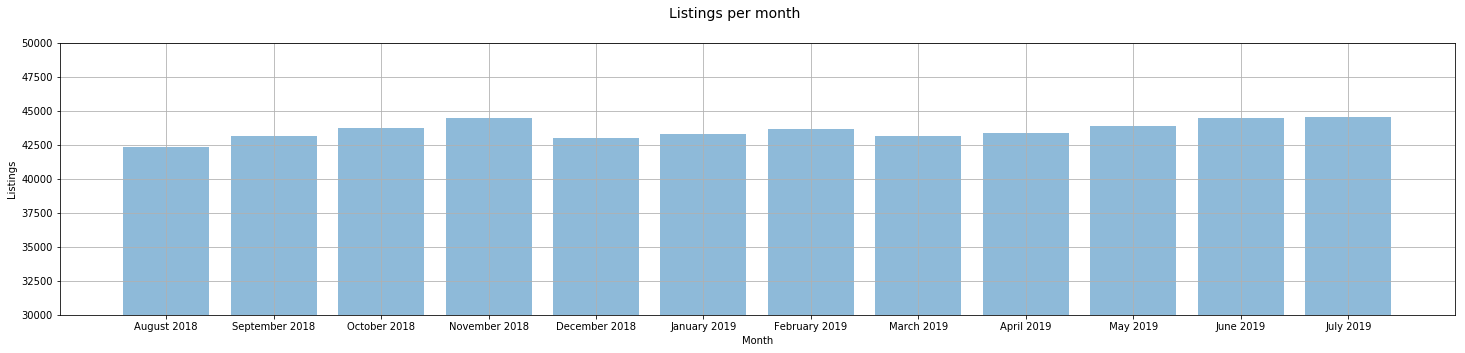

In [4]:
city.supply_month([0,0],[30000,50000])

* Seasons were Airbnb increases are the following months: September, October and November, as well in April, May and June.

## Daily price per month (Avg.) USD
Period of the year to maximise revenue

Average daily rate: $198.97


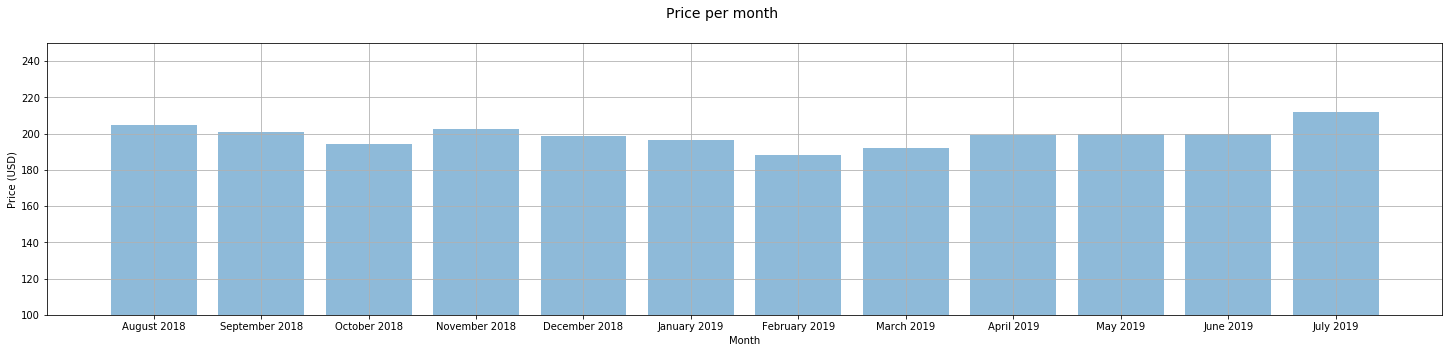

In [5]:
city.daily_rate([0,0],[100,250])
#Gráfica ordenada por mes

* April , May, and June  are the best periods to maximize revenue. 

# Total estimated revenue of bookings for 30 days or less (USD)

How big is the Airbnb LA market?

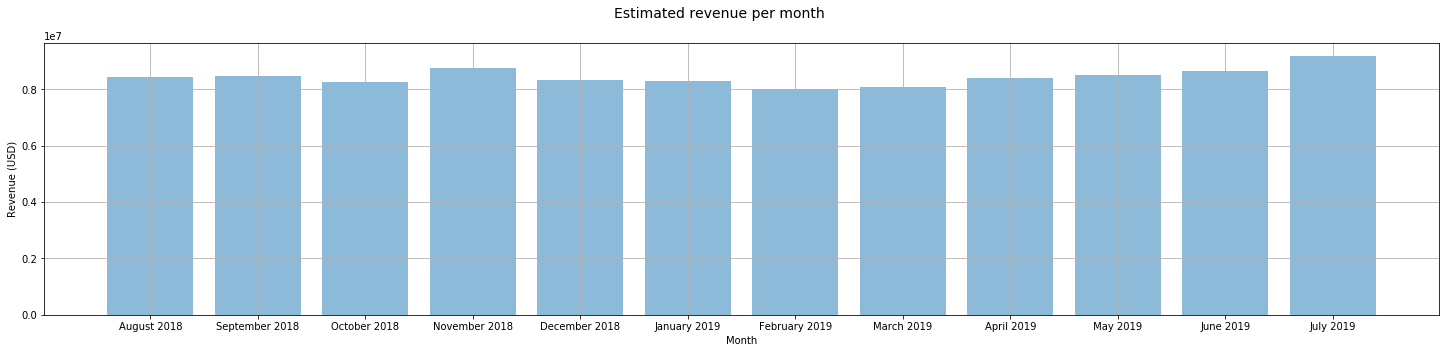

In [6]:
city.price_night([0,0],[0,0])

* The market has a value per month around 8 million USD. 


## Minimum nights*
How long does the hosts prefer to list their porperties?

In [7]:
city.bins_nights()

Minimum nights: 3.70


,Minimum nights,# of listing
0,30 days,"509,392.00"
1,90 days,"11,471.00"
2,More than 90 days,19.00


LA hosts prefer to rent in average 3 nights, representing 97% of the listings, longer trends are marginal

# Minimum nights and estimated revenue are correlated?

In [8]:
# Estimated revenue
estimated_revenue =  AIRBNB_DT
estimated_revenue['Estimated_revenue'] = AIRBNB_DT['price'] * AIRBNB_DT['minimum_nights']

In [9]:
estimated_revenue['Estimated_revenue'].corr(estimated_revenue['minimum_nights'])

0.33477498861420707

Minimum nights and estimated revenue are 33% correlated with each other.

## Room Type list

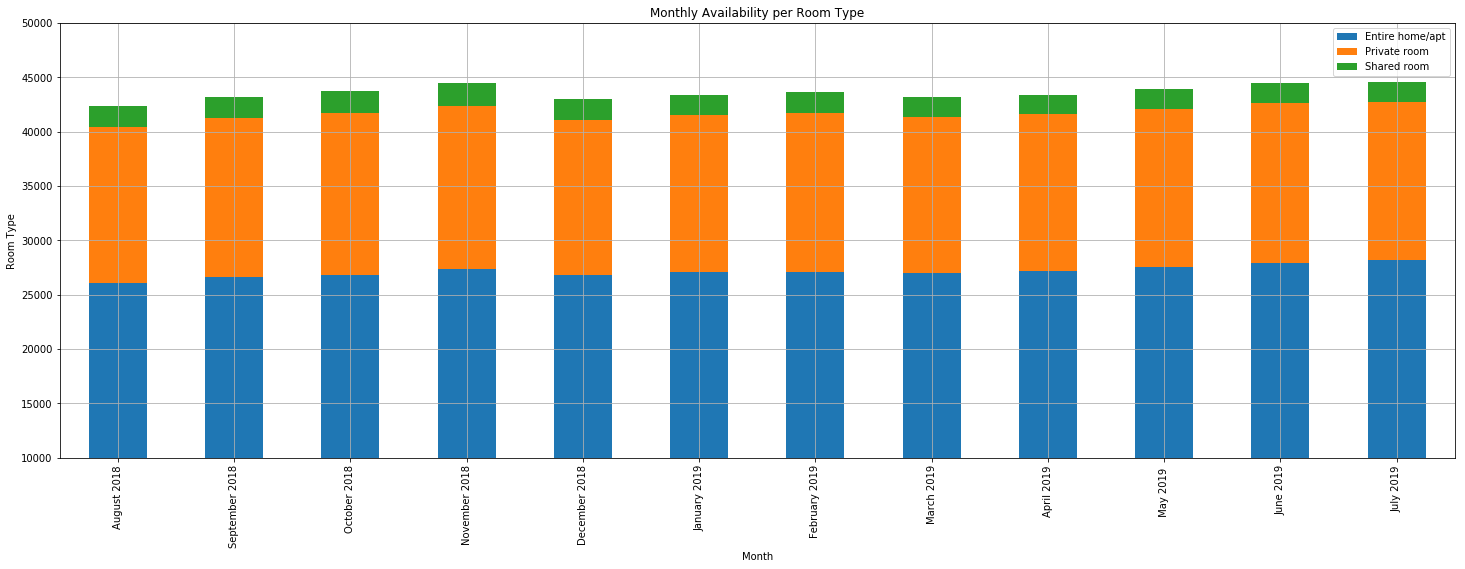

In [10]:
city.room_type([0,0],[10000,50000])

* LA hosts prefer to rent full houses/apartments, single rooms have a declining trend

## Bedrooms per propertie

,Bedrooms,# of Properties
0,0.0,"56,372.00"
1,1.0,"307,432.00"
2,2.0,"91,921.00"
3,3.0,"39,735.00"
4,4.0,"16,541.00"
5,5.0,"7,099.00"
6,6.0,"2,151.00"


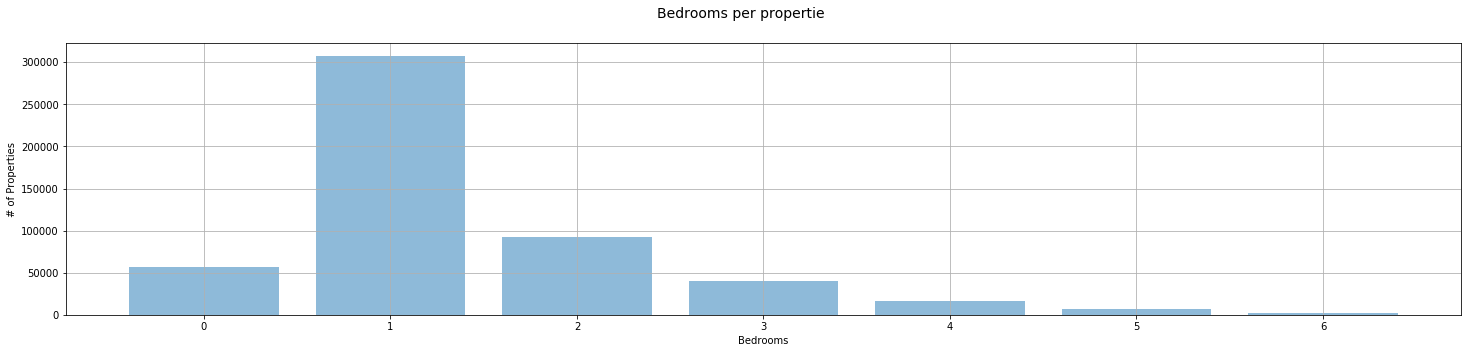

In [11]:
city.bedrooms([0,0],[0,0])

* Renting a place with one or 2 bedrooms seems to give the host good rentals.

# If you want to take advantage of this new industry and translate it into a business opportunity. What are the key factors you should take into account?
### Let's check!

## Avg price per room type
* First, let's see which are the room types that are rented for a higher price. 

,Room Type,Price
0,Entire home/apt,$269.87
1,Private room,$86.00
2,Shared room,$51.82


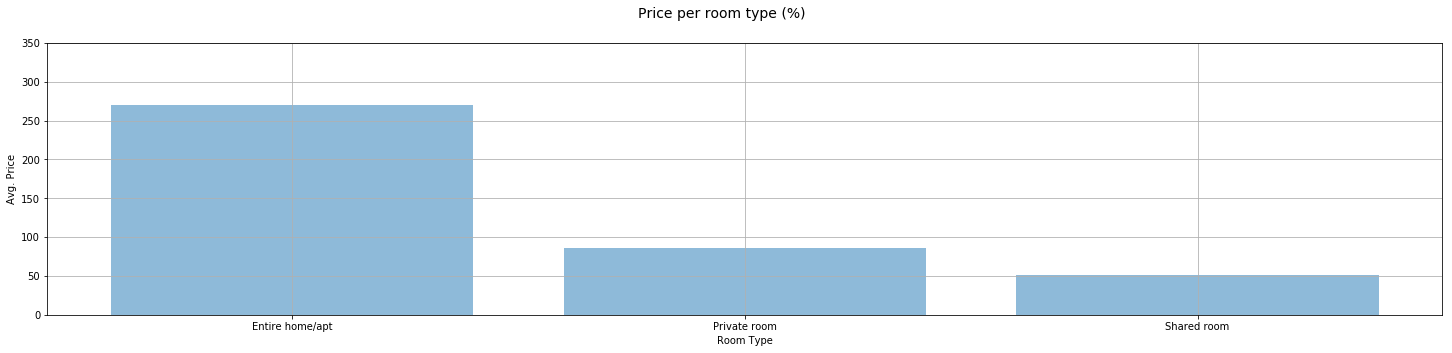

In [12]:
city.price_type_room([0,0],[0,350])

Like one might imagine, Entire home/apt are the most expensive airbnb, followed by the private rooms and at the end, shared bedrooms. Just to be sure there's a consistent and significant difference between the prices of each room type, let's do a t-test.

In [13]:
city.room_type_t_test()

,Room Type,Statistic,p-value
0,Entire home/apt - Private room,152.765805,0.000000e+00
1,Private room - Shared room,19.607864,4.947830e-85


High t-stat and low p-value. We're safe, there's a significance difference between the Entire home/apt price and the private and shared bedrooms.

Then you might ask, which part of town is where high prices are observed?

## Average price per neighborhood (Top 10 - USD)

,Neighbourhood,Properties,Price
0,Malibu,"4,638.00","$1,306.67"
1,Bel Air/Beverly Crest,"5,100.00","$1,270.11"
2,Laurel Canyon,"3,476.00",$839.11
3,Beverly Hills,"6,917.00",$597.20
4,Pacific Palisades,"2,866.00",$445.05
5,Palos Verdes,208.00,$426.13
6,Encino,"2,407.00",$392.80
7,Hollywood Hills,"9,711.00",$366.72
8,Manhattan Beach,"2,783.00",$337.47
9,Cahuenga Pass,"2,086.00",$318.35


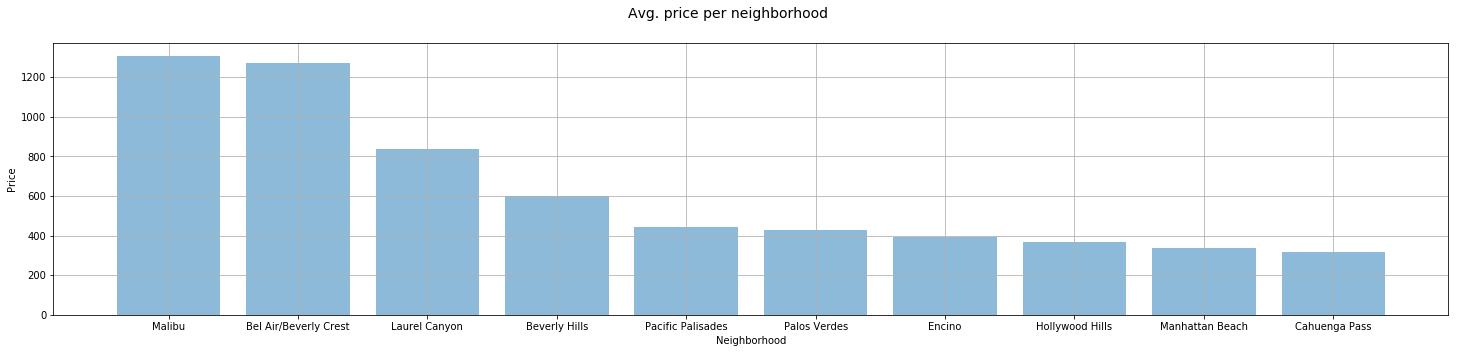

In [14]:
#Los Angeles average price per neighborhood (to get the top 5 best neighborhoods)
city.neighborhood([0,0],[0,0],'p')

* These are the neighbourhoods that have the highest Avg. price and the prices for each of these neighbourhoods are significantly higher than the average price for all Airbnb listings.

### Are these prices consistently higher than the average?

In [15]:
city.p_value_test()

,City,Statistic,p-value
0,Malibu,38.755689,6.246721e-285
1,Bel Air/Beverly Crest,36.171455,2.913160e-255
2,Laurel Canyon,20.541878,1.346300e-88
3,Beverly Hills,21.981779,1.384482e-103
4,Pacific Palisades,20.644617,1.980607e-88
5,Palos Verdes,7.318458,5.427359e-12
6,Encino,10.768200,1.920092e-26
7,Hollywood Hills,24.960607,2.007628e-133
8,Manhattan Beach,20.767888,2.574006e-89
9,Cahuenga Pass,11.018876,1.723502e-27


### And what about amenities? What are the amenities an airbnb listing should offer to guarantee a high price?

In [16]:
city.amenities()

,Item,Coefficient,R2,p-value,Std Error
11,Pool,191.222240,2.475941,0.000000e+00,1.659285
8,Hot tub,201.618698,2.299449,0.000000e+00,1.817039
12,Free parking on premises,101.973123,0.947114,0.000000e+00,1.441833
0,TV,106.056190,0.677348,0.000000e+00,1.775625
7,Washer,73.389162,0.352920,0.000000e+00,1.704994
1,Cable TV,64.761884,0.340386,0.000000e+00,1.532111
6,Kitchen,90.300807,0.299557,0.000000e+00,2.277703
5,Gym,70.900715,0.237331,2.734240e-272,2.009805
9,Free street parking,-49.150566,0.217505,1.069084e-249,1.455520
3,Air conditioning,51.331977,0.185019,1.100044e-212,1.648447


* After running a regression with the presence or absence (binary variable) of a list of basic ammenities. We found out that the Pool, Hot tub, Free parking, TV and Washer ammenities are those that have a bigger explanatory power to "explain" the price of Airbnb listings.   

* Now that we know what an Airbnb should offer, where should it be located and what type should it be. Let's focus now on the reviews. According to our analysis, reviews play an important part in the price. 

In [17]:
city.reviews()

,Coefficent,R2,p-value,Std error
0,1.102121,0.113553,6.469856e-104,0.050899


There is a clear relationship between avg reviews and avg price for the cases analyzed. The better review, the higher the price.

Reviews are broken down by type of review [Accuracy, Cleanliness, Check in, Communication, Location and Value] and based on our correlation matrix, Accuracy and Value reviews are related to General Review. 

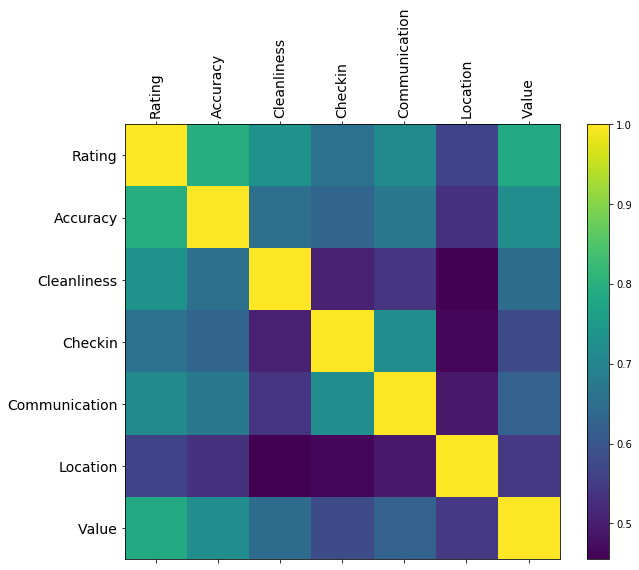

In [18]:
#Correlation coeficient
city.correlation()

Having said that, once you are operating under airbnb, focus on checking your reviews, specially the ones related to Accuracy and Value, and try to cover any holes you might find.

# Airbnb vs honest job USA

In [19]:
Average_daily_rate =  199.18
Airbnb_month = Average_daily_rate*30
wage = pd.read_csv('csv/lbs.csv')
month_average = wage.mean(axis=1)
wage_2 = pd.DataFrame({'Airbnb monthly revenue': [5975.40], 'Average USA wage 2018': [3605.59]})
wage_2.rename(index={0:'2018'},inplace=True)
wage_2_output = wage_2.copy()
wage_2_output.applymap('${:,.2f}'.format)

,Airbnb monthly revenue,Average USA wage 2018
2018,"$5,975.40","$3,605.59"


##### Assuming a host actually has a month full of bookings, is more profitable to be an Airbnb host than go everyday to work

Text(0, 0.5, 'USD')

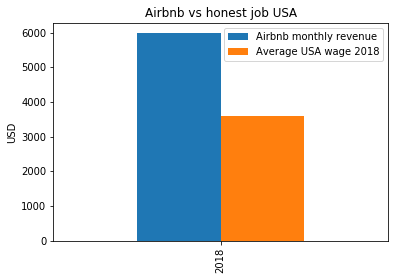

In [22]:
wage_2.plot(kind='bar')
plt.title("Airbnb vs honest job USA")

plt.ylabel("USD")

# Conclussions: 
##### If you are looking to have a high price airbnb listing, these are the factors you should take into account:

* Offer an entire home/apt, if you have the option, or a private room, if the first option is not available.

* Location, location, location. The cited neighbourhoods will almost guarantee you a high price.

*  There is evidence stating that cited  amenities have a relatively high explanatory power and important weight in the airbnb prices.

* Check your reviews. Specially the accuracy and the value reviews. Check the feedback visitors provide and try to improve constantly in these fields

# Thank you!